In [44]:
# all necessary imports
import json
import csv
import pandas as pd

from transformers import pipeline
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import LongformerTokenizer, LongformerForSequenceClassification, EncoderDecoderModel, LongformerConfig, LongformerTokenizerFast
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df= pd.read_csv('/Users/jyotit-kaushal/github/boozeless-analytics/data/singapore_processed_dataset.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11865 entries, 0 to 11864
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   venue_id                  11865 non-null  object 
 1   latitude                  11865 non-null  float64
 2   longitude                 11865 non-null  float64
 3   venue_name                11864 non-null  object 
 4   platform_listing_url      11865 non-null  object 
 5   region                    11865 non-null  object 
 6   neighborhood              11865 non-null  object 
 7   address                   11826 non-null  object 
 8   phone                     8416 non-null   object 
 9   website                   7481 non-null   object 
 10  price_point_bucket        11865 non-null  object 
 11  review_count              11227 non-null  float64
 12  review_sample             11865 non-null  object 
 13  opening_hours             11865 non-null  object 
 14  platfo

In [47]:
# pivot table for venue_segment
pivot_table_venueseg = pd.pivot_table(df, 
                            index='venue_segment', 
                            aggfunc='size', 
                            fill_value=0)

print(pivot_table_venueseg)

venue_segment
Bar               816
Cafe             1520
Entertainment     341
Hawker Food      2326
Hotel             474
Non Alcoholic     532
Restaurant       5545
Stores            302
dtype: int64


/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_71420/2105429218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=segment_counts.values, y=segment_counts.index, palette="Oranges", orient='horizontal')


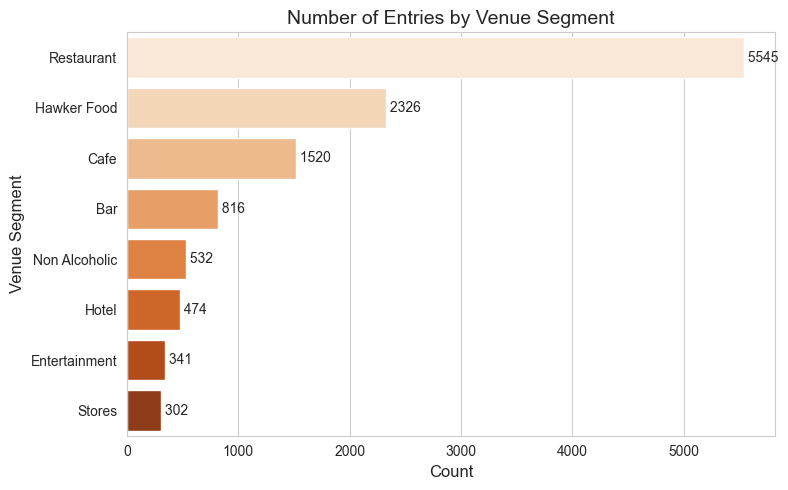

In [48]:
# sns.theme(palette= "#FF5B00")
segment_counts = df['venue_segment'].value_counts()

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=segment_counts.values, y=segment_counts.index, palette="Oranges", orient='horizontal')
plt.title('Number of Entries by Venue Segment', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Venue Segment', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, count in enumerate(segment_counts.values):
    barplot.text(count, i, f' {count}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [49]:
excluded_segments = ["Bar", "Entertainment", "Non Alcoholic", "Restaurant"]
df = df[df["venue_segment"].isin(excluded_segments)]

df.shape

(7234, 34)

/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_71420/1388033513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=segment_counts.values, y=segment_counts.index, palette="Oranges", orient='horizontal')


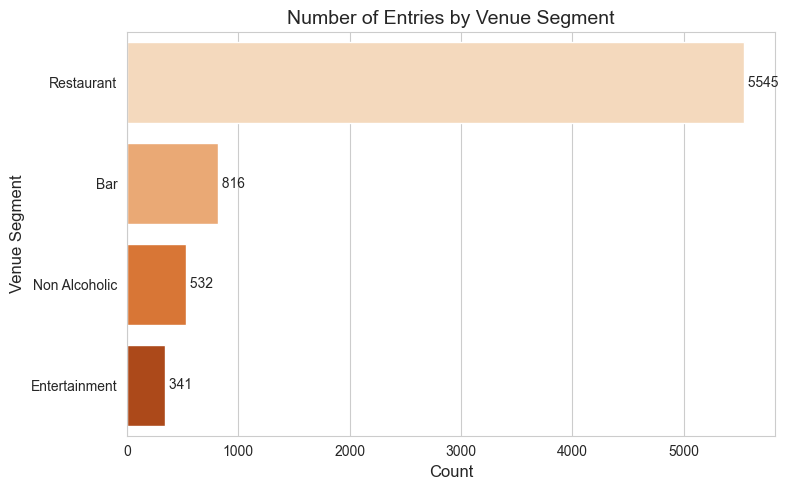

In [50]:
segment_counts = df['venue_segment'].value_counts()

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=segment_counts.values, y=segment_counts.index, palette="Oranges", orient='horizontal')
plt.title('Number of Entries by Venue Segment', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Venue Segment', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, count in enumerate(segment_counts.values):
    barplot.text(count, i, f' {count}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

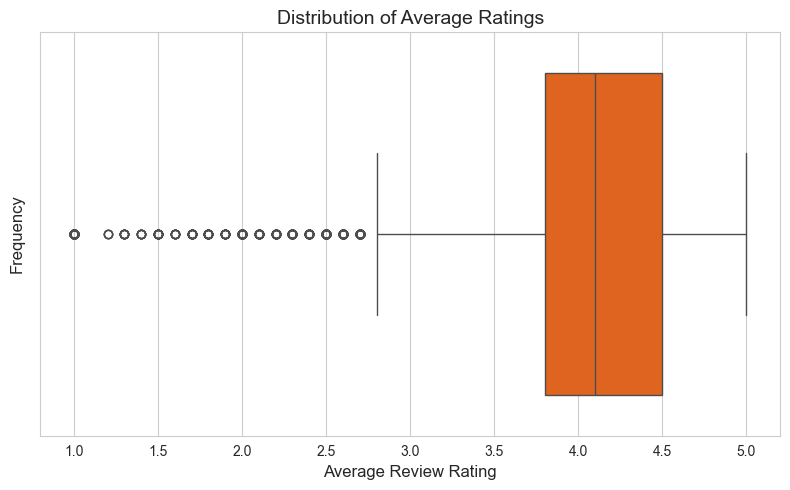

In [51]:
sns.set_style("whitegrid")
df_temp= pd.read_json('/Users/jyotit-kaushal/github/boozeless-analytics/data/singapore_geo_dataset.json')
# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_temp['average_rating'], color='#FF5B00')
plt.title('Distribution of Average Ratings', fontsize=14)
plt.xlabel('Average Review Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

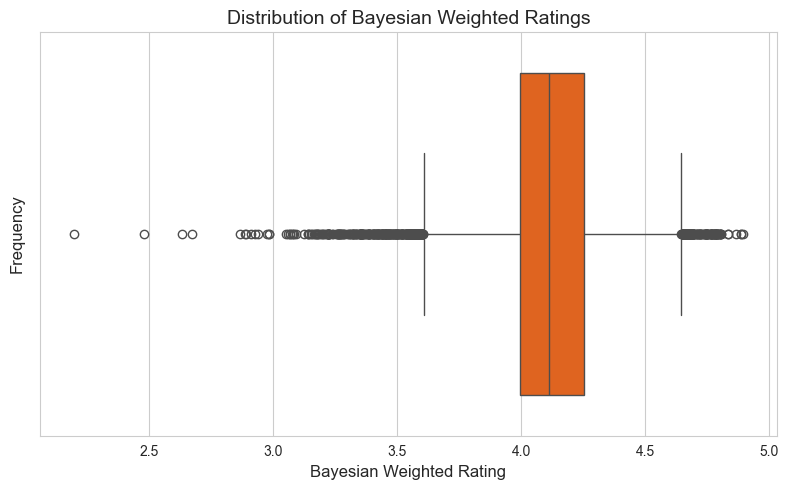

In [52]:
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['bayesian_weighted_rating'], color='#FF5B00')
plt.title('Distribution of Bayesian Weighted Ratings', fontsize=14)
plt.xlabel('Bayesian Weighted Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [53]:
df = df[df['bayesian_weighted_rating'] >= 4]
df.shape

(5383, 34)

/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_71420/3970645368.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=pricepoint_counts.values, y=pricepoint_counts.index, palette="rocket", orient='horizontal')


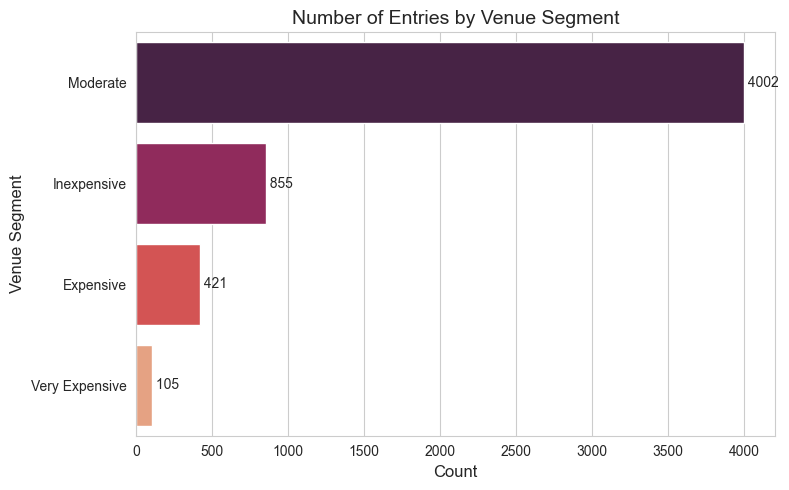

In [54]:
pricepoints= df['price_point_bucket'].tolist()

def change_to_symbols(lst):
    symbols = {'$': 'Inexpensive', '$$': 'Moderate', '$$$': 'Expensive', '$$$$':'Very Expensive'}
    result = []

    for value in lst:
        if value in symbols:
            result.append(symbols[value])
        else:
            result.append(value)

    return result

df['price_point_bucket']= change_to_symbols(pricepoints)

pricepoint_counts = df['price_point_bucket'].value_counts()

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=pricepoint_counts.values, y=pricepoint_counts.index, palette="rocket", orient='horizontal')
plt.title('Number of Entries by Venue Segment', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Venue Segment', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, count in enumerate(pricepoint_counts.values):
    barplot.text(count, i, f' {count}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [55]:
# pivot table for price_point_bucket
pivot_table_pricepoint = pd.pivot_table(df, 
                            index='price_point_bucket', 
                            aggfunc='size', 
                            fill_value=0)

print(pivot_table_pricepoint)

price_point_bucket
Expensive          421
Inexpensive        855
Moderate          4002
Very Expensive     105
dtype: int64


In [56]:
included_price_points= ['Expensive', 'Very Expensive']
df= df[df['price_point_bucket'].isin(included_price_points)]

df.shape

(526, 34)

In [59]:
df_boozeless= pd.read_csv('/Users/jyotit-kaushal/github/boozeless-analytics/data/restaurants_sorted_boozeless.csv')


In [62]:
import folium

# Create a map centered around the mean latitude and longitude
map_center = [df_boozeless['latitude'].mean(), df_boozeless['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Iterate over the DataFrame rows and add markers to the map
for index, row in df_boozeless.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['venue_name'],
        icon=folium.Icon(color='blue' if row['boozeless_rating'] == 'blue' else 'green' if row['boozeless_rating'] == 'green' else 'red')
    ).add_to(mymap)

# Display the map
mymap


In [64]:
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Function to convert boozeless_rating to color
def rating_to_color(rating):
    # Define colormap and normalization
    cmap = plt.cm.get_cmap('viridis')
    norm = Normalize(vmin=df_boozeless['boozeless_rating'].min(), vmax=df_boozeless['boozeless_rating'].max())
    # Map rating to color
    color = cmap(norm(rating))
    # Convert RGBA color to hex
    return plt.colors.rgb2hex(color)

# Create a map centered around the mean latitude and longitude
map_center = [df_boozeless['latitude'].mean(), df_boozeless['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Create marker cluster for better performance with large datasets
marker_cluster = MarkerCluster().add_to(mymap)

# Iterate over the DataFrame rows and add markers to the map
for index, row in df_boozeless.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['venue_name'],
        icon=folium.Icon(color=rating_to_color(row['boozeless_rating']), icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
mymap


/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_71420/2630698096.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

In [65]:
import folium
from folium.plugins import MarkerCluster
from matplotlib import colors
from matplotlib.cm import ScalarMappable

# Function to convert boozeless_rating to color
def rating_to_color(rating):
    # Define colormap and normalization
    cmap = plt.cm.get_cmap('viridis')
    norm = colors.Normalize(vmin=df_boozeless['boozeless_rating'].min(), vmax=df_boozeless['boozeless_rating'].max())
    # Map rating to color
    color = cmap(norm(rating))
    # Convert RGBA color to hex
    return colors.rgb2hex(color)

# Create a map centered around the mean latitude and longitude
map_center = [df_boozeless['latitude'].mean(), df_boozeless['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Create marker cluster for better performance with large datasets
marker_cluster = MarkerCluster().add_to(mymap)

# Iterate over the DataFrame rows and add markers to the map
for index, row in df_boozeless.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['venue_name'],
        icon=folium.Icon(color=rating_to_color(row['boozeless_rating']), icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
mymap


/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_71420/1852614711.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')
/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_71420/1852614711.py:28: UserWarning: color argument of Icon should be one of: {'white', 'black', 'gray', 'pink', 'red', 'blue', 'orange', 'darkred', 'darkpurple', 'darkblue', 'lightgray', 'cadetblue', 'green', 'lightgreen', 'purple', 'lightblue', 'lightred', 'beige', 'darkgreen'}.
  icon=folium.Icon(color=rating_to_color(row['boozeless_rating']), icon='info-sign')


In [66]:
import folium

# Function to convert boozeless_rating to color
def rating_to_color(rating):
    # Map rating to a color gradient
    color = (int(255 * (1 - rating)), int(255 * rating), 0)  # R: from 255 to 0, G: from 0 to 255, B: constant 0
    # Convert to hex format
    return '#{:02x}{:02x}{:02x}'.format(*color)

# Create a map centered around the mean latitude and longitude
map_center = [df_boozeless['latitude'].mean(), df_boozeless['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Iterate over the DataFrame rows and add markers to the map
for index, row in df_boozeless.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['venue_name'],
        icon=folium.Icon(color=rating_to_color(row['boozeless_rating']), icon='info-sign')
    ).add_to(mymap)

# Display the map
mymap


/var/folders/47/sx3slfp54xv_8syv33c8kzz80000gn/T/ipykernel_71420/1491019060.py:19: UserWarning: color argument of Icon should be one of: {'white', 'black', 'gray', 'pink', 'red', 'blue', 'orange', 'darkred', 'darkpurple', 'darkblue', 'lightgray', 'cadetblue', 'green', 'lightgreen', 'purple', 'lightblue', 'lightred', 'beige', 'darkgreen'}.
  icon=folium.Icon(color=rating_to_color(row['boozeless_rating']), icon='info-sign')
